In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [47]:
#Required text pre-processing libraries are imported
import string
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import tokenize from nltk library
from nltk import tokenize
# import WordNetLemmatizer from nltk library
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist

#Required data visualisation libraries are imported
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt


#Required prediction modelling libraries are imported
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, precision_score, precision_recall_fscore_support, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline

import xgboost
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jillian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#reading in single_word dataset

In [4]:
df = pd.read_csv('./data/singe_word_data.csv')

In [5]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"['sooo', 'pretty', 'happened', 'find', 'store'...",sooo pretty happened find store glad bc never ...,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['high', 'hope', 'wanted', 'work', 'initially'...",high hope wanted work initially petite usual f...,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['jumpsuit', 'fun', 'flirty', 'fabulous', 'eve...",jumpsuit fun flirty fabulous every time get no...,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['shirt', 'flattering', 'due', 'adjustable', '...",shirt flattering due adjustable front tie perf...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22640 entries, 0 to 22639
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review_Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended_IND          22640 non-null  int64 
 6   Positive_Feedback_Count  22640 non-null  int64 
 7   Division_Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class_Name               22627 non-null  object
 10  Clean                    22640 non-null  object
 11  String                   22636 non-null  object
 12  Positive_Rating          22640 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.2+ MB


In [7]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                13
Department Name              13
Class_Name                   13
Clean                         0
String                        4
Positive_Rating               0
dtype: int64

In [8]:
df[df.String.isna() == True]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
4123,857,55,NaN,Love this top!,5,1,1,General,Tops,Knits,[],NaN,1
10869,1094,54,NaN,Love this dress !!,5,1,0,General Petite,Dresses,Dresses,[],NaN,1
13324,1078,37,Love,Love this dress and the color,5,1,1,General,Dresses,Dresses,[],NaN,1
15779,1087,27,NaN,I love this dress!,5,1,3,General,Dresses,Dresses,[],NaN,1


In [9]:
#due to adding words to our stop list, we now have 4 "Clean" reviews with no words; 
#we will eliminate these rows for modeling

In [10]:
df = df[df.String.isna() == False]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22636 entries, 0 to 22639
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              22636 non-null  int64 
 1   Age                      22636 non-null  int64 
 2   Title                    19674 non-null  object
 3   Review_Text              22636 non-null  object
 4   Rating                   22636 non-null  int64 
 5   Recommended_IND          22636 non-null  int64 
 6   Positive_Feedback_Count  22636 non-null  int64 
 7   Division_Name            22623 non-null  object
 8   Department Name          22623 non-null  object
 9   Class_Name               22623 non-null  object
 10  Clean                    22636 non-null  object
 11  String                   22636 non-null  object
 12  Positive_Rating          22636 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


# Modeling with Single Words Vectorized

In [12]:
#will be using accuracy as metric; want to identify neutral/negative sentiments and be able
#to sample enough of them to get a clear view of if there is a consistent issue
#that we as a company can change for our soft roll out
#also want to be able to ball park which items will be most popular, so we can have
#an appropriate amount of inventory

For each model we created a pipeline that includes a TF-IDF vectorizer, a smote component to deal with class imbalance, and the classifier itself. We elected to use a TF-IDF vectorizer instead of a count vectorizer because it provides a way to understand the importance of each word to the tweet, as well as just how frequently it occurs.

To give the model a little bit more information with those same features, we'll use a TfidfVectorizer (documentation here) so that it counts not only the term frequency (tf) within a single document, it also includes the inverse document frequency (idf) — how rare the term is.


## Train-Test Split

In [13]:
# Specify X as the cleaned strings in df and y as the target-Rating.
X = df['String']
y = df['Rating']

In [14]:
#Performed the train-test split, using 20% for the hold-out data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.20)

In [15]:
X_train

19638    always lookout piece polished arent fussy blaz...
12706    short linen touch stretch great keeping shape ...
9196     wanted sweater lavender design pleated back be...
4689               glad tried see lovely definitely keeper
21455    got fooled description polyester wool claim ch...
                               ...                        
11966    great work enjoying brunch dinner friend comfo...
21579    cozy wrap material soft find grabbing anytime ...
5391     duster nice light weight dark navy throw add l...
860      excited see jean since came petite short insea...
15799    sweater pretty soft real life purchase coral r...
Name: String, Length: 18108, dtype: object

In [16]:
# Instantiate a vectorizer 
# Instantiate and fit/transform X_train using the TF-IDF vectorizer.
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train)
X_train_vectorized

<18108x15448 sparse matrix of type '<class 'numpy.float64'>'
	with 409986 stored elements in Compressed Sparse Row format>

In [17]:
# Convert vectorized X_train to a vector for easier visual inspection.
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
X_train_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00p,00p0p,00p0rxxsxs,02xs,03dd,0dd,0in,0p,0pand,0petite,...,zippered,zipperi,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Transform test data using TF-IDF Vectorizer trained on X_train, y_train
X_test_vectorized = tfidf.transform(X_test)
X_test_vectorized

<4528x15448 sparse matrix of type '<class 'numpy.float64'>'
	with 98903 stored elements in Compressed Sparse Row format>

In [19]:
# Convert to DataFrame for visual inspection
X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())
X_test_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00p,00p0p,00p0rxxsxs,02xs,03dd,0dd,0in,0p,0pand,0petite,...,zippered,zipperi,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Function to return scores in cross validation

In [21]:
# Accuracy
accuracy = make_scorer(accuracy_score)

#f1
custom_f1 = make_scorer(
    f1_score, 
    average="weighted")

# Precision
multi_prec = make_scorer(
    precision_score,
    average="weighted")

# Recall
multi_rec = make_scorer(
    recall_score,
    average="weighted")

# This function will allow for quick cross-validation of the chosen score for each of our models.
def cross_val(model, X, y, custom_scorer, kfolds=5):
    """ Perform cross-validated scoring and store/print results """
    results = cross_val_score(model, X, y, cv=kfolds, scoring=custom_scorer)
    mean = np.mean(results)
    median = np.median(results)
    std = np.std(results)
    if custom_scorer == accuracy:
        print(f"Mean accuracy score: ", {mean}, ".")
        print(f"Median acuracy score: ", {median}, ".")
        print(f"Standard Deviation in accuracy: ", {std}, ".") 
    elif custom_scorer == custom_f1:
        print(f"Mean f1 score: ", {mean}, ".")
        print(f"Median f1 score: ", {median}, ".")
        print(f"Standard Deviation in f1 score: ", {std}, ".") 
    elif custom_scorer == multi_prec:
        print(f"Mean precision score: ", {mean}, ".")
        print(f"Median precision score: ", {median}, ".")
        print(f"Standard Deviation in precision score: ", {std}, ".") 
    elif custom_scorer == multi_rec:
        print(f"Mean recall score: ", {mean}, ".")
        print(f"Median recall score: ", {median}, ".")
        print(f"Standard Deviation in recall score: ", {std}, ".") 

## Dummy Classifier

0.5514689639938148


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


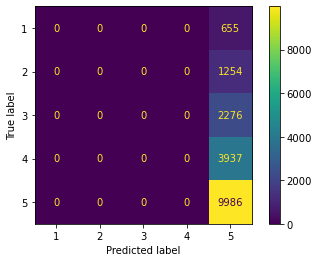

In [22]:
# Instantiate Dummy Classifier 
dummy_model = DummyClassifier()

#Fit and Evaluate Dummy Classifier
dummy_model.fit(X_train_vectorized, y_train)
dummy_yhat = dummy_model.predict(X_train)
plot_confusion_matrix(dummy_model, X_train, y_train);
print(accuracy_score(y_train, dummy_yhat))

We see our Dummy Model predicts our majority label, 1, for each observation. Due to class imbalance, the model performed at 55% accuracy score.

## Initial Model CV Results

In [23]:
benchmark = []
# Iterate over all algorithms
for algorithm in [MultinomialNB(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), XGBClassifier(), RandomForestClassifier()]:
    # Perform cross validation
    results = cross_val_score(algorithm, X_train_vectorized, y_train)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm')

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

,0
Algorithm,
MultinomialNB(),0.552242
LogisticRegression(),0.628010
KNeighborsClassifier(),0.547106
DecisionTreeClassifier(),0.499502
"XGBClassifier(base_score=None,",0.607632
RandomForestClassifier(),0.579689


In [25]:
##Logistic Regression cannot be used for multi-class classification; should explore XGBClassifier and RandomForestClassifier

# Setting up SMOTE Subpipe

In [33]:
subpipe_smote = SMOTE(sampling_strategy='auto', random_state=42)

## Random Forest Classifier

### Initial Pipeline

In [48]:
# Create our random forest pipeline to incorporate column transformer, use default hyperparameters
rfc_pipe = Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                           ('rfc', RandomForestClassifier(random_state=42))])


In [29]:
# Fit our random forest classifier to the training data
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [30]:
# Calculate initial accuracy score of random forest with default hyperparameters
rfc_pipe.score(X_train, y_train)

1.0

In [32]:
#not surprising our model has a score of 1; going to be overfit

In [31]:
# Obtained cross-validated accuracy score
cross_val(rfc_pipe, X_train, y_train, accuracy)

Mean accuracy score:  {0.5931079074135155} .
Median acuracy score:  {0.5940347970173985} .
Standard Deviation in accuracy:  {0.0034594074415810554} .


In [33]:
#oof... much worse score when cross validating

In [52]:
# Instantiate XGBClassifier with SMOTE subpipe
rfc_sm_pipe = Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)), 
                           ('sm', subpipe_smote),
                            ('rfc', RandomForestClassifier(random_state=42))])

In [53]:
rfc_sm_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                ('sm', SMOTE(random_state=42)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [54]:
rfc_sm_pipe.score(X_train, y_train)

1.0

In [55]:
# Obtained cross-validated accuracy score
cross_val(rfc_sm_pipe, X_train, y_train, accuracy)

Mean accuracy score:  {0.5971946728933055} .
Median acuracy score:  {0.5966316951960243} .
Standard Deviation in accuracy:  {0.002967413198704753} .


## Initial Random Forest Grid Search

In [87]:
# create our grid for the grid search parameters
params = {'rfc__n_estimators': [50, 100, 150],
          'rfc__min_samples_split': [2, 10, 50],
          'rfc__max_depth': [5, 10, 15],
          'vect__max_features': [2000, 3000],
          'vect__ngram_range': [(1,1), (2,2)]}

# set up GridSearchCV object
grid_rfc = GridSearchCV(rfc_pipe, param_grid=params, cv=5, verbose=3)

In [88]:
#grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.5s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.5s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.5s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.5s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.5s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2

[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.8s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.8s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.8s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.8s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.8s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 2/5] END rfc__max_

[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.9s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.9s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.9s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.9s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   1.0s
[CV 3/5] END rfc

[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.551 total time=   0.7s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.7s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.7s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.8s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.9s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.9s
[CV 4/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   1.0s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   1.0s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.9s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.9s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.9s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.9s
[CV 5/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.6s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.6s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.8s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.8s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.8s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.8s
[CV 5/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.6s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.552 total time=   0.6s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.8s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.8s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.8s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.8s
[CV 5/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   1.2s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   1.2s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   1.1s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   1.0s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 5/5] E

[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   2.1s
[CV 1/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.3s
[CV 2/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   1.3s
[CV 3/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.4s
[CV 4/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.2s
[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.3s
[CV 1/5] END rfc

[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.552 total time=   1.2s
[CV 1/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 2/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.551 total time=   1.0s
[CV 3/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 4/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 1/5] E

[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.2s
[CV 1/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   1.0s
[CV 2/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   1.0s
[CV 3/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.551 total time=   0.9s
[CV 4/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.9s
[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.552 total time=   0.9s
[CV 1/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2000)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__max_depth': [5, 10, 15],
                         'rfc__min_samples_split': [2, 10, 50],
                         'rfc__n_estimators': [50, 100, 150],
                         'vect__max_features': [2000, 3000],
                         'vect__ngram_range': [(1, 1), (2, 2)]},
             verbose=3)

In [89]:
# find the best hyper parameters from our first grid search
#grid_rfc.best_params_

{'rfc__max_depth': 15,
 'rfc__min_samples_split': 2,
 'rfc__n_estimators': 150,
 'vect__max_features': 2000,
 'vect__ngram_range': (1, 1)}

- 'rfc__max_depth': 15,
- 'rfc__min_samples_split': 2,
- 'rfc__n_estimators': 150,
- 'vect__max_features': 2000,
- 'vect__ngram_range': (1, 1)}

In [97]:
#maxed out parameters for max_depth and n_estimators; will increae for next grid search

In [90]:
# calculate the best accuracy score from our first grid search
#grid_rfc.best_score_

0.5529048523773297

0.5529048523773297

In [91]:
pd.DataFrame(grid_rfc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__max_depth,param_rfc__min_samples_split,param_rfc__n_estimators,param_vect__max_features,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.432327,0.009217,0.065862,0.000313,5,2,50,2000,"(1, 1)","{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.551629,0.551353,0.551353,0.551505,0.551505,0.551469,0.000105,45
1,0.675577,0.013613,0.074853,0.002893,5,2,50,2000,"(2, 2)","{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.551629,0.551353,0.551353,0.551505,0.551505,0.551469,0.000105,45
2,0.423456,0.004969,0.068631,0.001697,5,2,50,3000,"(1, 1)","{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.551629,0.551353,0.551353,0.551505,0.551505,0.551469,0.000105,45
3,0.665471,0.004091,0.073386,0.000496,5,2,50,3000,"(2, 2)","{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.551629,0.551353,0.551353,0.551505,0.551505,0.551469,0.000105,45
4,0.608242,0.001524,0.076709,0.000238,5,2,100,2000,"(1, 1)","{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.551629,0.551353,0.551353,0.551505,0.551505,0.551469,0.000105,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.876241,0.019526,0.087198,0.000528,15,50,100,3000,"(2, 2)","{'rfc__max_depth': 15, 'rfc__min_samples_split...",0.551629,0.551353,0.551353,0.551505,0.551505,0.551469,0.000105,45
104,1.527344,0.004987,0.099242,0.000371,15,50,150,2000,"(1, 1)","{'rfc__max_depth': 15, 'rfc__min_samples_split...",0.552181,0.552733,0.552457,0.553991,0.552334,0.552739,0.000651,7
105,1.023390,0.020711,0.097746,0.000712,15,50,150,2000,"(2, 2)","{'rfc__max_depth': 15, 'rfc__min_samples_split...",0.551629,0.551353,0.551629,0.551505,0.551505,0.551524,0.000102,25
106,1.391642,0.007242,0.099956,0.000440,15,50,150,3000,"(1, 1)","{'rfc__max_depth': 15, 'rfc__min_samples_split...",0.551629,0.551629,0.551353,0.552610,0.552057,0.551856,0.000439,17


## XGBoost

In [22]:
# Instantiate our default XGB pipeline
XGB_pipe = ImPipeline(steps=[('vect', TfidfVectorizer(max_features=2000)), 
                             ('XGB', XGBClassifier())])

In [37]:
# Fit the xgb pipeline to our training data
XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [39]:
#Assess the score
XGB_pipe.score(X_train, y_train)

0.8354870775347912

In [40]:
# Obtained cross-validated accuracy score
cross_val(XGB_pipe, X_train, y_train, accuracy)

Mean accuracy score:  {0.6091226694518188} .
Median acuracy score:  {0.6079514080618443} .
Standard Deviation in accuracy:  {0.0033772415482406937} .


In [41]:
training_preds = XGB_pipe.predict(X_train)

In [42]:
print(classification_report(y_train, training_preds))

              precision    recall  f1-score   support

           1       0.99      0.72      0.84       655
           2       0.95      0.72      0.82      1254
           3       0.90      0.72      0.80      2276
           4       0.89      0.56      0.69      3937
           5       0.80      0.99      0.89      9986

    accuracy                           0.84     18108
   macro avg       0.91      0.74      0.81     18108
weighted avg       0.85      0.84      0.83     18108



/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


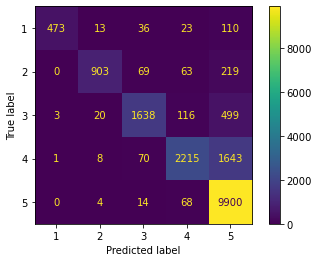

In [43]:
plot_confusion_matrix(XGB_pipe, X_train, y_train);

In [46]:
# Instantiate XGBClassifier with SMOTE subpipe
XGB_sm_pipe = ImPipeline(steps=[('vect', TfidfVectorizer(max_features=2000)), 
                           ('sm', subpipe_smote),
                            ('XGB', XGBClassifier())])

In [47]:
XGB_sm_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                ('sm', SMOTE(random_state=42)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [48]:
#Assess the score
XGB_sm_pipe.score(X_train, y_train)

0.7800419703998233

In [49]:
# Obtained cross-validated accuracy score
cross_val(XGB_sm_pipe, X_train, y_train, accuracy)

Mean accuracy score:  {0.5957031434065136} .
Median acuracy score:  {0.5940347970173985} .
Standard Deviation in accuracy:  {0.00570749300118217} .


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


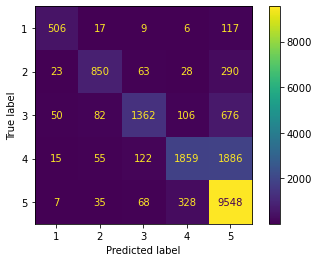

In [50]:
plot_confusion_matrix(XGB_sm_pipe, X_train, y_train);

In [51]:
#results not as good with SMOTE

## Initial XGBoost Grid Search

In [101]:
# create our massive grid for the grid search parameters
paramsXGB = {
    'XGB__learning_rate': [0.1, 0.2],
    'XGB__max_depth': range(3, 10, 2),
    'XGB__min_child_weight': range(1, 8, 2),
    'XGB__gamma': [0, .1, .2],
    'XGB__subsample': [.5, .75, 1],
    'vect__ngram_range': [(1,1), (2,2)]
}

In [104]:
grid_XGB = GridSearchCV(XGB_pipe, param_grid=paramsXGB, cv=5, verbose=3, n_jobs=-2)

#Fit grid search object to our training data to check the hyper parameters

In [105]:
#grid_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2000)),
                                       ('XGB',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                                      max_depth=6,
                                                      min_child_weight=1,
                                                      missing=n...
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=None,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             n_jobs=-2,
             param_grid={'XGB__gamma': [0, 0.1, 0.2],
                         'XGB__learning_rate': [0.1, 0.2],
                         'XGB__max_depth': range(3, 10, 2),
                         'XGB__min_child_weight': range(1, 8, 2),
                         'XGB__subsample': [0.5, 0.75, 1],
                         'vect__ngram_range': [(1, 1), (2, 2)]},
             verbose=3)

In [106]:
# find the best hyper parameters from our first grid search
#grid_XGB.best_params_

{'XGB__gamma': 0.1,
 'XGB__learning_rate': 0.2,
 'XGB__max_depth': 9,
 'XGB__min_child_weight': 7,
 'XGB__subsample': 0.75,
 'vect__ngram_range': (1, 1)}

- {'XGB__gamma': 0.1,
- 'XGB__learning_rate': 0.2,
- 'XGB__max_depth': 9,
- 'XGB__min_child_weight': 7,
- 'XGB__subsample': 0.75,
- 'vect__ngram_range': (1, 1)}

In [108]:
# calculate the best accuracy score from our first grid search
#grid_XGB.best_score_

0.6189529572493482

0.6189529572493482

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


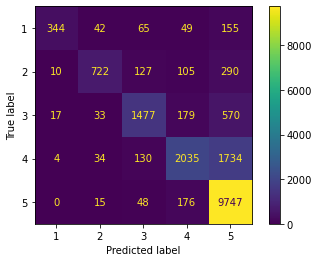

In [109]:
plot_confusion_matrix(grid_XGB, X_train, y_train);

In [110]:
print(classification_report(y_train, grid_XGB.predict(X_train)))

              precision    recall  f1-score   support

           1       0.92      0.53      0.67       655
           2       0.85      0.58      0.69      1254
           3       0.80      0.65      0.72      2276
           4       0.80      0.52      0.63      3937
           5       0.78      0.98      0.87      9986

    accuracy                           0.79     18108
   macro avg       0.83      0.65      0.71     18108
weighted avg       0.80      0.79      0.78     18108



If our review is a 5, we are most likely rating that review a 5 (high recall). However, we are also rating many addition reviews a 5 (low precision). 

In [111]:
# Instantiate our XGB pipeline with best params
XGB_pipe2 = ImPipeline(steps=[('vect', TfidfVectorizer(max_features=2000)), 
                             ('XGB', XGBClassifier(gamma=.1, learning_rate=.2, max_depth=9, min_child_weight=7, subsample=.75))])

In [113]:
XGB_pipe2.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=7, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [114]:
XGB_pipe2.score(X_train, y_train)

0.7910868124585818

We have achieved 79% accuracy with our params from our grid search.

In [115]:
cross_val(XGB_pipe2, X_train, y_train, accuracy)

Mean accuracy score:  {0.6189529572493482} .
Median acuracy score:  {0.6178906681391496} .
Standard Deviation in accuracy:  {0.002534962207861195} .


As expected, when cross-validating our mean accuracy is only 61.9% (same as .best_score_).

Since we maxed out learning rate, max depth, and min child weight, I will adjust these and use higher ranges in my next grid search.

In [23]:
paramsXGB = {
    'XGB__learning_rate': [0.1, 0.2, 0.3],
    'XGB__max_depth': [9, 12, 15],
    'XGB__min_child_weight': [6, 8, 10],
    'XGB__gamma': [0, .1, .2],
    'XGB__subsample': [.5, .75, 1],
}

In [24]:
grid_XGB2 = GridSearchCV(XGB_pipe, param_grid=paramsXGB, cv=5, verbose=3, n_jobs=-2)


In [25]:
grid_XGB2.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2000)),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight...
                                                      num_parallel_tree=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-2,
             param_grid={'XGB__gamma': [0, 0.1, 0.2],
                         'XGB__learning_rate': [0.1, 0.2, 0.3],
                         'XGB__max_depth': [9, 12, 15],
                         'XGB__min_child_weight': [6, 8, 10],
                         'XGB__subsample': [0.5, 0.75, 1]},
             verbose=3)

In [26]:
grid_XGB2.best_params_

{'XGB__gamma': 0.2,
 'XGB__learning_rate': 0.2,
 'XGB__max_depth': 12,
 'XGB__min_child_weight': 10,
 'XGB__subsample': 0.75}

- {'XGB__gamma': 0.2,
- 'XGB__learning_rate': 0.2,
- 'XGB__max_depth': 12,
- 'XGB__min_child_weight': 10,
- 'XGB__subsample': 0.75}

In [27]:
grid_XGB2.best_score_

0.6188977238883981

0.6188977238883981

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


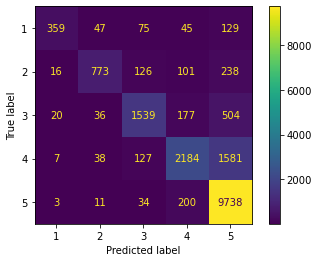

In [29]:
plot_confusion_matrix(grid_XGB2, X_train, y_train);

In [31]:
#this grid search performed worse than last grid search; will try adding
#Smote in pipeline 

In [34]:
#same as XGB_pipe2 but with Smote
XGB_pipe3 = ImPipeline(steps=[('vect', TfidfVectorizer(max_features=2000)), 
                              ('sm', subpipe_smote),
                             ('XGB', XGBClassifier(gamma=.1, learning_rate=.2, max_depth=9, min_child_weight=7, subsample=.75))])

In [35]:
XGB_pipe3.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=2000)),
                ('sm', SMOTE(random_state=42)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=7, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [36]:
XGB_pipe3.score(X_train, y_train)

0.793185332449746

In [39]:
# Obtained cross-validated accuracy score
cross_val(XGB_pipe3, X_train, y_train, accuracy)

Mean accuracy score:  {0.5991268950631714} .
Median acuracy score:  {0.5981772990886496} .
Standard Deviation in accuracy:  {0.005983973041853741} .


In [42]:
#cross val mean of 59.9%, median of 59.8%; not as good as results without SMOTE

In [40]:
print(classification_report(y_train, XGB_pipe3.predict(X_train)))

              precision    recall  f1-score   support

           1       0.86      0.78      0.82       655
           2       0.83      0.71      0.77      1254
           3       0.83      0.63      0.72      2276
           4       0.80      0.51      0.62      3937
           5       0.78      0.95      0.86      9986

    accuracy                           0.79     18108
   macro avg       0.82      0.72      0.76     18108
weighted avg       0.80      0.79      0.78     18108



/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


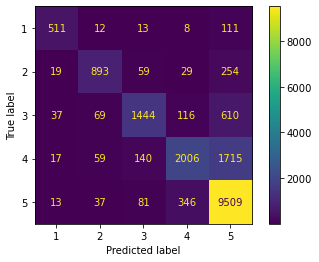

In [37]:
plot_confusion_matrix(XGB_pipe3, X_train, y_train);

# Modeling with Bigrams Without Additional Stop Words Removed

In [65]:
df2 = pd.read_csv('./data/bigram_data.csv')

In [66]:
df2.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Review_Text.1,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333,"['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,0.633333,0.933333,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,0.339583,0.725000,"['love', 'dress', 'sooo', 'pretty', 'happened'...",love dress sooo pretty happened find store im ...,0.318750,0.725000,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,0.073675,0.356294,"['high', 'hope', 'dress', 'really', 'wanted', ...",high hope dress really wanted work initially o...,0.079865,0.349762,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,0.625000,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",love love love jumpsuit fun flirty fabulous ev...,0.500000,0.625000,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,0.512891,0.568750,"['shirt', 'very', 'flattering', 'due', 'adjust...",shirt very flattering due adjustable front tie...,0.393750,0.568750,1


## Train Test Split

In [67]:
#train test split for data to utilize bigrams

In [68]:
# Specify X as the cleaned strings in df and y as the target-Rating.
X2 = df2['String']
y2 = df2['Rating']

In [69]:
#Performed the train-test split, using 20% for the hold-out data.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                    y2,
                                                    random_state=42,
                                                    test_size=0.20)

In [75]:
# Instantiate a vectorizer 
# Instantiate and fit/transform X_train using the TF-IDF vectorizer.
tfidf = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
X_train2_vectorized = tfidf.fit_transform(X_train2)
X_train2_vectorized

<18112x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 121886 stored elements in Compressed Sparse Row format>

In [76]:
# Convert vectorized X_train to a vector for easier visual inspection.
X_train2_vec = pd.DataFrame.sparse.from_spmatrix(X_train2_vectorized, columns=tfidf.get_feature_names())
X_train2_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,34b waist,able get,able wear,absolutely beautiful,absolutely gorgeous,absolutely love,across back,across bust,across chest,across shoulder,...,write review,xl fit,xl retailer,xx petite,year ago,year come,year old,year round,youre looking,zipper back
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412253,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [77]:
# Transform test data using TF-IDF Vectorizer trained on X_train, y_train
X_test2_vectorized = tfidf.transform(X_test2)
X_test2_vectorized

<4528x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 29516 stored elements in Compressed Sparse Row format>

In [78]:
# Convert to DataFrame for visual inspection
X_test2_vec = pd.DataFrame.sparse.from_spmatrix(X_test2_vectorized, columns=tfidf.get_feature_names())
X_test2_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,34b waist,able get,able wear,absolutely beautiful,absolutely gorgeous,absolutely love,across back,across bust,across chest,across shoulder,...,write review,xl fit,xl retailer,xx petite,year ago,year come,year old,year round,youre looking,zipper back
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
benchmark = []
# Iterate over all algorithms
for algorithm in [MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier(), XGBClassifier(), RandomForestClassifier()]:
    # Perform cross validation
    results = cross_val_score(algorithm, X_train2_vectorized, y_train2)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm')

,0
Algorithm,
MultinomialNB(),0.594744
KNeighborsClassifier(),0.439157
DecisionTreeClassifier(),0.497073
"XGBClassifier(base_score=None,",0.580001
RandomForestClassifier(),0.572272


In [80]:
##MultinomialNB best in initial cv with defaults; initially not peforming as well with bigrams, will try tweaking models

## Multinomial Model with Bigrams

In [81]:
# Instantiate our default MultinomialNB pipeline
mnb_pipe = ImPipeline(steps=[('vect', TfidfVectorizer(ngram_range=(2,2), max_features=2000)), 
                             ('mnb', MultinomialNB())])

In [82]:
mnb_pipe.fit(X_train2, y_train2)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=2000, ngram_range=(2, 2))),
                ('mnb', MultinomialNB())])

In [83]:
mnb_pipe.score(X_train2, y_train2)

0.6330057420494699

In [84]:
# Obtained cross-validated accuracy score
cross_val(mnb_pipe, X_train2, y_train2, accuracy)

Mean accuracy score:  {0.5946338603312508} .
Median acuracy score:  {0.5922142462727775} .
Standard Deviation in accuracy:  {0.0052759049423663495} .


In [ ]:
#grid_XGB.fit(X_train, y_train)

## Random Forest Grid Search

In [92]:
#running the same initial grid search on this data set that did not eliminiate additional stop words

In [93]:
# create our grid for the grid search parameters
params = {'rfc__n_estimators': [50, 100, 150],
          'rfc__min_samples_split': [2, 10, 50],
          'rfc__max_depth': [5, 10, 15],
          'vect__max_features': [2000, 3000],
          'vect__ngram_range': [(1,1), (2,2)]}

# set up GridSearchCV object
grid_rfc = GridSearchCV(rfc_pipe, param_grid=params, cv=5, verbose=3)

In [94]:
#grid_rfc.fit(X_train2, y_train2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.6s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.6s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.6s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.6s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.6s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2

[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.9s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 2/5] END rfc__max_

[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.0s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=10, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 3/5] END rfc

[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.8s
[CV 4/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.8s
[CV 5/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.8s
[CV 1/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 2/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 3/5] END rfc__max_depth=5, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 4/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.2s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.2s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=2, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 5/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.7s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.8s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.0s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=10, rfc__n_estimators=50, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   0.9s
[CV 5/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.7s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.553 total time=   0.8s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   0.9s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   0.9s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   0.9s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=50, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.553 total time=   0.9s
[CV 5/5] END rfc

[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.4s
[CV 5/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.553 total time=   1.3s
[CV 1/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.2s
[CV 2/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.2s
[CV 3/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.2s
[CV 4/5] END rfc__max_depth=10, rfc__min_samples_split=50, rfc__n_estimators=150, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.3s
[CV 5/5] E

[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.556 total time=   2.4s
[CV 1/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.4s
[CV 2/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.4s
[CV 3/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.4s
[CV 4/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.555 total time=   1.4s
[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=2, rfc__n_estimators=150, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.555 total time=   1.4s
[CV 1/5] END rfc

[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(1, 1);, score=0.555 total time=   1.4s
[CV 1/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 2/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 3/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.1s
[CV 4/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=10, rfc__n_estimators=100, vect__max_features=3000, vect__ngram_range=(2, 2);, score=0.553 total time=   1.1s
[CV 1/5] E

[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(1, 1);, score=0.554 total time=   1.5s
[CV 1/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.555 total time=   1.1s
[CV 2/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.1s
[CV 3/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.1s
[CV 4/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.555 total time=   1.1s
[CV 5/5] END rfc__max_depth=15, rfc__min_samples_split=50, rfc__n_estimators=100, vect__max_features=2000, vect__ngram_range=(2, 2);, score=0.554 total time=   1.1s
[CV 1/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2000)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__max_depth': [5, 10, 15],
                         'rfc__min_samples_split': [2, 10, 50],
                         'rfc__n_estimators': [50, 100, 150],
                         'vect__max_features': [2000, 3000],
                         'vect__ngram_range': [(1, 1), (2, 2)]},
             verbose=3)

In [95]:
# find the best hyper parameters from our first grid search
#grid_rfc.best_params_

{'rfc__max_depth': 15,
 'rfc__min_samples_split': 2,
 'rfc__n_estimators': 50,
 'vect__max_features': 2000,
 'vect__ngram_range': (1, 1)}

- {'rfc__max_depth': 15,
- 'rfc__min_samples_split': 2,
- 'rfc__n_estimators': 50,
- 'vect__max_features': 2000,
- 'vect__ngram_range': (1, 1)}

In [96]:
# calculate the best accuracy score from our first grid search
#grid_rfc.best_score_

0.5550463303274542

0.5550463303274542

In [99]:
##still seeing ngram_range of (1,1) (single words) producing better results; better results 
#using no additional stop words cleaned... interesting

In [49]:
# create our grid for the grid search parameters
params = {'rfc__n_estimators': [25, 50, 75],
          'rfc__min_samples_split': [2, 3, 5],
          'rfc__max_depth': [15, 20, 25],
          'vect__ngram_range': [(1,1), (2,2)]}

# set up GridSearchCV object
grid_rfc2 = GridSearchCV(rfc_pipe, param_grid=params, cv=5, verbose=3, n_jobs=-2)

In [50]:
grid_rfc2.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2000)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-2,
             param_grid={'rfc__max_depth': [15, 20, 25],
                         'rfc__min_samples_split': [2, 3, 5],
                         'rfc__n_estimators': [25, 50, 75],
                         'vect__ngram_range': [(1, 1), (2, 2)]},
             verbose=3)

In [54]:
grid_rfc2.best_score_

0.5645017995065595

In [55]:
grid_rfc2.best_params_

{'rfc__max_depth': 25,
 'rfc__min_samples_split': 3,
 'rfc__n_estimators': 25,
 'vect__ngram_range': (1, 1)}

In [57]:
# create our massive grid for the grid search parameters
params5 = {'rfc__n_estimators': [15, 20, 25],
           'rfc__max_depth': [20, 25, 30],
           'rfc__max_features': ['sqrt', 0.1, 0.2, 0.5],
           'rfc__min_samples_split': [2, 3, 4],
           'rfc__min_impurity_decrease': [0, 0.05, 0.1]}

# set up GridSearchCV object
grid_rfc3 = GridSearchCV(rfc_pipe, param_grid=params5, cv=5, verbose=3, n_jobs=-1)

In [58]:
grid_rfc3.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2000)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [20, 25, 30],
                         'rfc__max_features': ['sqrt', 0.1, 0.2, 0.5],
                         'rfc__min_impurity_decrease': [0, 0.05, 0.1],
                         'rfc__min_samples_split': [2, 3, 4],
                         'rfc__n_estimators': [15, 20, 25]},
             verbose=3)

In [59]:
grid_rfc3.best_score_

0.5900157236660618

In [60]:
grid_rfc3.best_params_

{'rfc__max_depth': 30,
 'rfc__max_features': 0.1,
 'rfc__min_impurity_decrease': 0,
 'rfc__min_samples_split': 3,
 'rfc__n_estimators': 20}